In [1]:
'''
Programmer: Mike Kovacevich
Last edited: 11/1/20
E-mail: mgk56@drexel.edu

Stacking sensitivity for different time windows and different gamma (spectral indices). Gamma will range from 2-3 and the time windows will range from 10^(-2) seconds to 10^5 seconds. Stacking sensitivity will be performed with Csky likelihood software.  
'''

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import argparse
import histlite as hl
import csky as cy

#Building/loading MESC data from analysis directory
ana_dir = cy.utils.ensure_dir('/data/user/mkovacevich/FRB_analysis/cascades_ana')
repo = cy.selections.Repository()
ana = cy.analysis.Analysis(repo, cy.selections.MESEDataSpecs.mesc_7yr, dir=ana_dir)

#Directories to store the trials
'''
trials_dir = cy.utils.ensure_dir('/data/user/mkovacevich/FRB_analysis/trials')
sig_dir = cy.utils.ensure_dir('{}/One_thousand_Sources_sig'.format(trials_dir))
bg_dir = cy.utils.ensure_dir('{}/One_thousand_Sources_bg'.format(trials_dir))
'''

cy.CONF['ana'] = ana
cy.CONF['mp_cpus'] = 10.0

a = ana.anas[0]

##### Defining functions to compute flux ######    
def ndarray_to_TSD(trials):
    return cy.dists.TSD(cy.utils.Arrays(trials))

def tsd_merge(x):
    ts_values = np.concatenate([xx[0] for xx in x])
    n_zero = sum(xx[1] for xx in x)
    return cy.dists.TSD(ts_values, n_zero=n_zero)

def find_n_sig(beta=0.9, nsigma=None, n_srcs = 0):
    # get signal trials, background distribution, and trial runner
    sig_trials = cy.bk.get_best(sig, 'n_sig')
    #b = cy.bk.get_best(bg) #, 'gamma', gamma, 'dt', dt)
    b = bg
    src = cy.sources(FRB_ra_rad, FRB_dec_rad, mjd = FRB_mjd_time, sigma_t = np.zeros_like(FRB_ra_rad), t_100 = FRB_time_window)
    conf = {'extended':True, 'space':"ps",'time':"transient",'sig':"transient",'flux': cy.hyp.PowerLawFlux(gamma)}
    tr = cy.get_trial_runner(conf, src = src, ana=ana)
    # determine ts threshold
    if nsigma is not None:
        ts = b.isf_nsigma(nsigma)
    else:
        ts = 0
    # include background trials in calculation
    trials = {0: tr.get_many_fits(100)}
    trials.update(sig_trials)
    # get number of signal events
    # (arguments prevent additional trials from being run)
    result = tr.find_n_sig(ts, beta, max_batch_size=0, logging=False, trials=trials, n_bootstrap=1)
    # return flux
    return tr.to_E2dNdE(result, E0=1e5)

/home/mkovacevich/py3venv/lib/python3.7/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Setting up Analysis for:
MESC_2010_2016
Setting up MESC_2010_2016...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2013_MC.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC79_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2011_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2012_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2013_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2014_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2015_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2016_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC79_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC86_2011_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC86_2012_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/

In [7]:
time_windows = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0]
gamma = 3.0

src_bg_file_dir = ['One_thousand_Sources_bg', 'One_hundred_Sources_bg', 'Ten_Sources_bg']
src_sig_file_dir = ['One_thousand_Sources_sig', 'One_hundred_Sources_sig', 'Ten_Sources_sig']
n_src = [1000,100,10]

sens_one_thousand_srcs = {}
sens_one_hundred_srcs = {}
sens_ten_srcs = {}

for bg_trials, sig_trials, nsources in zip(src_bg_file_dir, src_sig_file_dir, n_src):
    
    if bg_trials == src_bg_file_dir[0]:
        FRB_mjd_time = np.load('/data/user/mkovacevich/FRB_analysis/One_thousand_FRBS_MJD.npy', allow_pickle = True )
        FRB_ra_rad = np.load('/data/user/mkovacevich/FRB_analysis/One_thousand_FRBS_RA.npy', allow_pickle = True)
        FRB_dec_rad = np.load('/data/user/mkovacevich/FRB_analysis/One_thousand_FRBS_DEC.npy', allow_pickle = True)
    elif bg_trials == src_bg_file_dir[1]:
        FRB_mjd_time = np.load('/data/user/mkovacevich/FRB_analysis/One_hundred_FRBS_MJD.npy', allow_pickle = True )
        FRB_ra_rad = np.load('/data/user/mkovacevich/FRB_analysis/One_hundred_FRBS_RA.npy', allow_pickle = True)
        FRB_dec_rad = np.load('/data/user/mkovacevich/FRB_analysis/One_hundred_FRBS_DEC.npy', allow_pickle = True)
    elif bg_trials == src_bg_file_dir[2]:
        FRB_mjd_time = np.load('/data/user/mkovacevich/FRB_analysis/Ten_FRBS_MJD.npy', allow_pickle = True )
        FRB_ra_rad = np.load('/data/user/mkovacevich/FRB_analysis/Ten_FRBS_RA.npy', allow_pickle = True)
        FRB_dec_rad = np.load('/data/user/mkovacevich/FRB_analysis/Ten_FRBS_DEC.npy', allow_pickle = True)
        
    sens = []
    
    for i in time_windows:
        print(i)
        fluxs_sens = []  
        dt = i
        dt_string = str(i)
        FRB_time_window = np.ones_like(FRB_ra_rad)*dt/86400.
        bg = cy.bk.get_all(
        f'/data/user/mkovacevich/FRB_analysis/trials/{bg_trials}/dt/{dt_string}/',
        'bg_trials_seed_*.0.npy',
        pre_convert=lambda x: (x['ts'][x['ts'] > 0], np.sum(x['ts'] == 0)),
        merge = tsd_merge,
        log=True)
        #print(bg)
        sig = cy.bk.get_all(f'/data/user/mkovacevich/FRB_analysis/trials/{sig_trials}/gamma/3.0/dt/{dt_string}/','sig*npy', merge=np.concatenate, post_convert=cy.utils.Arrays)
        fluxs_sens = find_n_sig(beta=0.9, n_srcs = nsources)
        sens.append(fluxs_sens)
        print('sens = ' + str(fluxs_sens))
        
    if nsources == 1000:
        sens_one_thousand_srcs = sens
    elif nsources == 100:
        sens_one_hundred_srcs = sens
    elif nsources == 10:
        sens_ten_srcs = sens
    

0.01
100 files loaded.                                                                                      
1900 files loaded.                                                                                                       
Performing 100 background trials using 10.0 cores:
        100/100 trials complete.   
sens = 0.11401677280761026
0.1
100 files loaded.                                                                                     
1900 files loaded.                                                                                                      
Performing 100 background trials using 10.0 cores:
        100/100 trials complete.   
sens = 0.12064955337276607
1.0
100 files loaded.                                                                                     
1900 files loaded.                                                                                                      
Performing 100 background trials using 10.0 cores:
        100/100 trials complete.  

In [2]:
time_windows = [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0]
sens_one_thousand_srcs = [0.11401677280761026,
 0.11577686484419934,
 0.12143501352220812,
 0.10603363437047889,
 0.12891850626365167,
 0.2075909131138606,
 0.4862450872422389]

In [3]:
sens_one_hundred_srcs = [0.11574299686732185,
 0.10669757343244288,
 0.10583248613520757,
 0.11393264549975983,
 0.1090611292455818,
 0.1274645800559604,
 0.19020492256484112]

In [4]:
sens_ten_srcs = [0.10502629042109088,
 0.11025582411218728,
 0.11302161747176491,
 0.10521461699466444,
 0.10593898628948553,
 0.10888537486780156,
 0.13543797267328925]

In [8]:
#Converting to flux per FRB & copying over the MESC analysis
#0.1077493092441084 for 0.1
MESC_sens = [0.10589442849608482, 0.1077493092441084, 0.10652667073322919, 0.10898243968659185, 0.10796400059738795, 0.1055303365847919, 0.11013134071451022, 0.14649931742425515]

MESC_sens_per_burst = [x / 22.0 for x in MESC_sens]
sens_per_burst_one_thousand_srcs = [x / 1000.0 for x in sens_one_thousand_srcs]
sens_per_burst_one_hundred_srcs = [x / 100.0 for x in sens_one_hundred_srcs]
sens_per_burst_ten_srcs = [x / 10.0 for x in sens_ten_srcs]

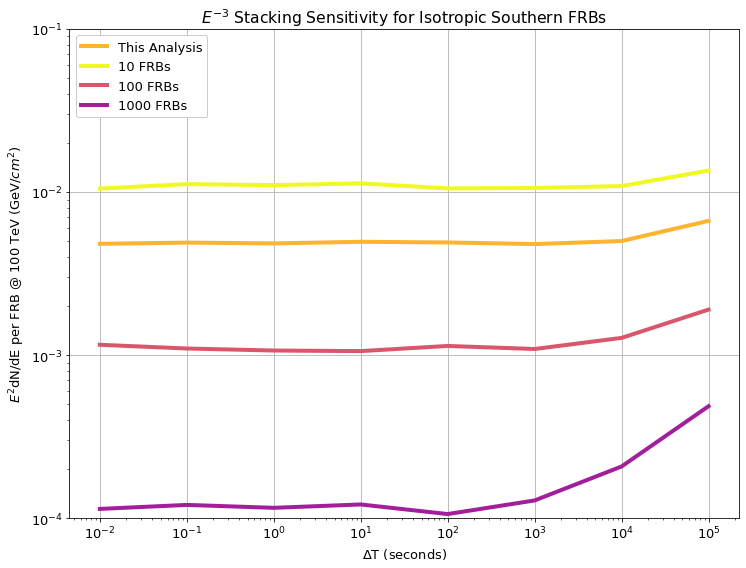

In [9]:
plt.rcParams.update({'font.size': 13})
fig, ax1= plt.subplots(1, figsize=(12,9)) #, gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)
g = 2.5
ax1.plot(time_windows, MESC_sens_per_burst, color = plt.get_cmap('plasma')(g/3), lw = 4, label = 'This Analysis')
ax1.plot(time_windows, sens_per_burst_ten_srcs,  color = plt.get_cmap('plasma')(g/2), lw = 4,label = r'10 FRBs')
ax1.plot(time_windows, sens_per_burst_one_hundred_srcs,  color = plt.get_cmap('plasma')(g/4.5), lw = 4, label = r'100 FRBs')
ax1.plot(time_windows, sens_per_burst_one_thousand_srcs,  color = plt.get_cmap('plasma')(g/7), lw = 4, label = r'1000 FRBs')

ax1.set_ylim(.0001, 0.1)
ax1.set_yscale('log')
ax1.set_xscale('log')
#ax1.axvline(x=0.01, color = 'black', linestyle='--')
#ax1.axvline(x=1000.0, color = 'black',  linestyle='--')
ax1.set_ylabel(r'$E^{2}$dN/dE per FRB @ 100 TeV (GeV/$cm^{2}$)')
ax1.set_xlabel(r'$\Delta$T (seconds)')
#ax1.set_xticks(color='white')
ax1.grid(True)
ax1.set_title(r'$E^{-3}$ Stacking Sensitivity for Isotropic Southern FRBs')
ax1.patch.set_facecolor('white')
ax1.legend(loc = 'upper left', framealpha = 1)

fig.patch.set_facecolor('white')

fig.savefig('/home/mkovacevich/public_html/Qual/N_sources.png', bbox_inches='tight')
#plt.subplots_adjust(hspace = 3.0)